# Impact of SMS Reminders on No-Shows

##### Does sending SMS appointment reminders to patients reduce the number of no-show appointments?

For this project, we will be analyzing this <a href="https://www.kaggle.com/datasets/joniarroba/noshowappointments">dataset</a>, which contains records on over 100k medical appointments in Brazil, in order to gain insight on if sending SMS reminders to patients helps reduce the occurance of appointment no-shows.

The dataset consists of one table with the following 14 columns:
<ul>
    <li>PatientID - The identification number for the patient.</li>
    <li>AppointmentID - The identification number for an appointment.</li>
    <li>Gender - Indicates whether the patient is male or female.</li>
    <li>ScheduledDay - The day the appointment was scheduled.</li>
    <li>AppointmentDay - The day of the appointment.</li>
    <li>Age - The age of the patient.</li>
    <li>Neighbourhood - The neighborhood the hospital is in.</li>
    <li>Scholarship - Indicates whether or not the patient is enrolled in the Brasilian Welfare Program.</li>
    <li>Hipertension - Indicates if the patient has hypertension or not.</li>
    <li>Diabetes - Indicates if the patient has diabetes or not.</li>
    <li>Alcoholism - Indicates if the patient has alcoholism or not.</li>
    <li>Handcap - Indicates if the patient is handicapped or not.</li>
    <li>SMS_received - Indicates if the patient was sent a SMS or not.</li>
    <li>No-show - Indicates if the patient was a no-show or not.</li>
</ul>

## Data Wrangling

In [1]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# Display the first 5 rows of the data to confirm data was loaded successfully
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [2]:
# Fetch dataframe information
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset consists of 14 columns and 110527 rows. There are no null values. There are some columns that can be dropped in the data cleaning stage of the project, as they won't be required for the analysis. The ScheduledDay and AppointmentDay columns should also be changed to the datetime data type if they are kept for further analysis.

In [3]:
# Check for duplicate data values
df.duplicated().sum()

0

In [4]:
# Show descriptive statistics for the dataframe
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


After reviewing these statistics, we can determine that 32% of patients received the SMS appointment reminder.

We can also see an issue with the data. The age column shows a minimum of -1, which is not a valid age value. We will correct this during the cleaning stage.

## Data Cleaning

Issues to address:
- There are some columns that can be dropped because they won't be required for the analysis. 
- The Neighbourhood column is misspelled.
- The ScheduledDay and AppointmentDay columns should be changed to the datetime data type.
- We will change the "Yes" and "No" values for the No-show column to 1 and 0 to make the data easier to work with.
- The age column should not have a minimum of -1, as this is not a valid age.

In [5]:
# Drop columns not being used for the analysis
df.drop(columns=['ScheduledDay', 'Scholarship', 'Handcap', 'Hipertension', 'Diabetes', 'Alcoholism'], inplace = True)

# Correct the spelling of the Neighbourhood column
df.rename(columns={'Neighbourhood': 'Neighborhood'}, inplace=True)

# Change data type for the AppointmentDay column (ScheduledDay was dropped)
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Change Yes and No values to 1 and 0, respectively
df['No-show'] = df['No-show'].replace({'Yes': 1, 'No': 0})

# Confirm changes were successful
df.dtypes

/var/folders/0c/9qxddwwx0jxg3gh6d9k3q2w40000gn/T/ipykernel_44524/3309488230.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['No-show'] = df['No-show'].replace({'Yes': 1, 'No': 0})


PatientId                     float64
AppointmentID                   int64
Gender                         object
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighborhood                   object
SMS_received                    int64
No-show                         int64
dtype: object

In [6]:
# Drop any row that has a negative age value
df.drop(df[df['Age'] < 0].index, inplace = True)

# Check to make sure the new Age minimum is 0 or greater 
print(df['Age'].min())

0


The data cleaning stage is now complete and we can now analyze the data.

## Exploratory Data Analysis (EDA)

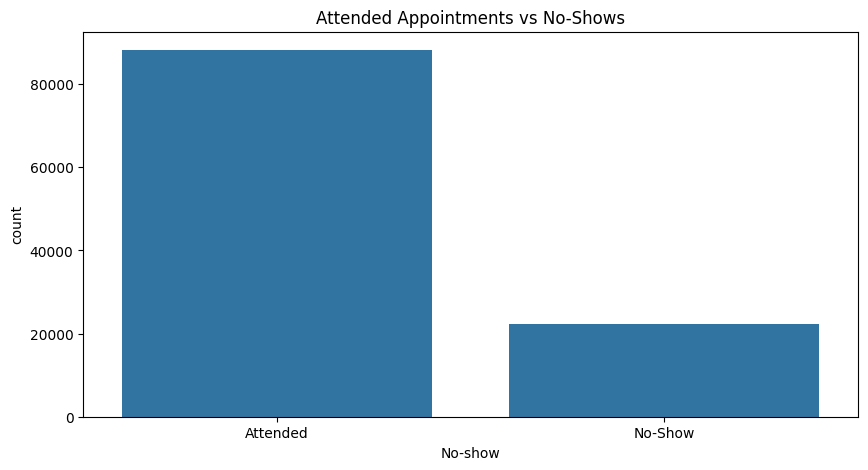

In [7]:
# Attended Appointments vs No-Shows
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'No-show')
plt.xticks([0, 1], ['Attended', 'No-Show'])
plt.title('Attended Appointments vs No-Shows')
plt.show()

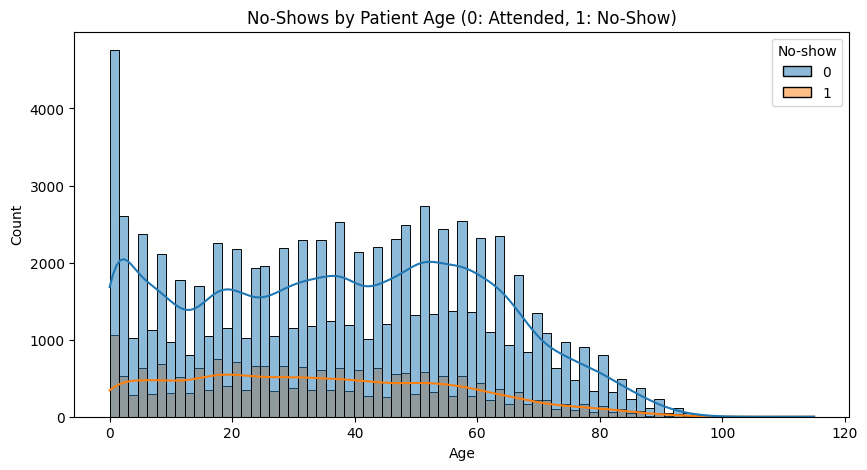

In [8]:
# No-shows by patient age
plt.figure(figsize = (10,5))
sns.histplot(data = df, x = 'Age', hue = 'No-show', kde = True)
plt.title('No-Shows by Patient Age (0: Attended, 1: No-Show)')
plt.show()

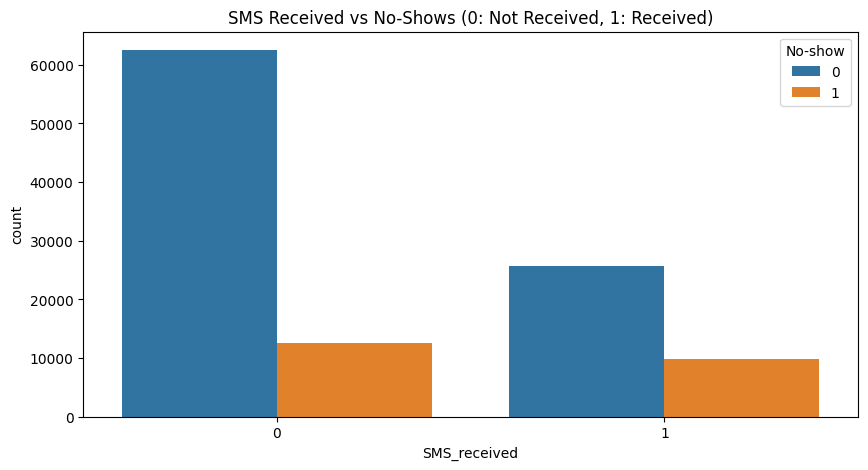

In [9]:
# SMS Received vs No-Shows
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='SMS_received', hue='No-show')
plt.title('SMS Received vs No-Shows (0: Not Received, 1: Received)')
plt.show()

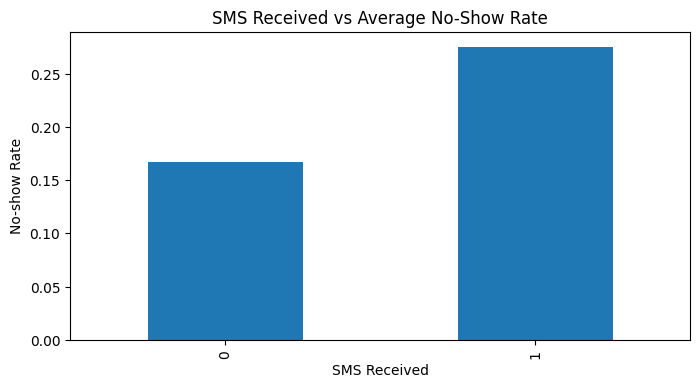

In [10]:
# Group by if the SMS was received or not and calculate the mean
no_show_mean = df.groupby('SMS_received')['No-show'].mean()

# SMS Received vs Average No-Show Rate
no_show_mean.plot(kind='bar', figsize=(8,4))
plt.xlabel("SMS Received")
plt.ylabel("No-show Rate")
plt.title("SMS Received vs Average No-Show Rate")
plt.show()

So far, our analysis shows that the no-show rate was actually higher for patients that did receive the SMS reminder. This indicates that receiving a text message appointment reminder does not reduce the number of no-shows.

We should check to see if the patient age group affects how likely the SMS reminder is to reduce to number of no-shows.

/var/folders/0c/9qxddwwx0jxg3gh6d9k3q2w40000gn/T/ipykernel_44524/441019861.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sms_age_group_no_shows = df.groupby(['SMS_received', 'AgeGroup'])['No-show'].mean().unstack()


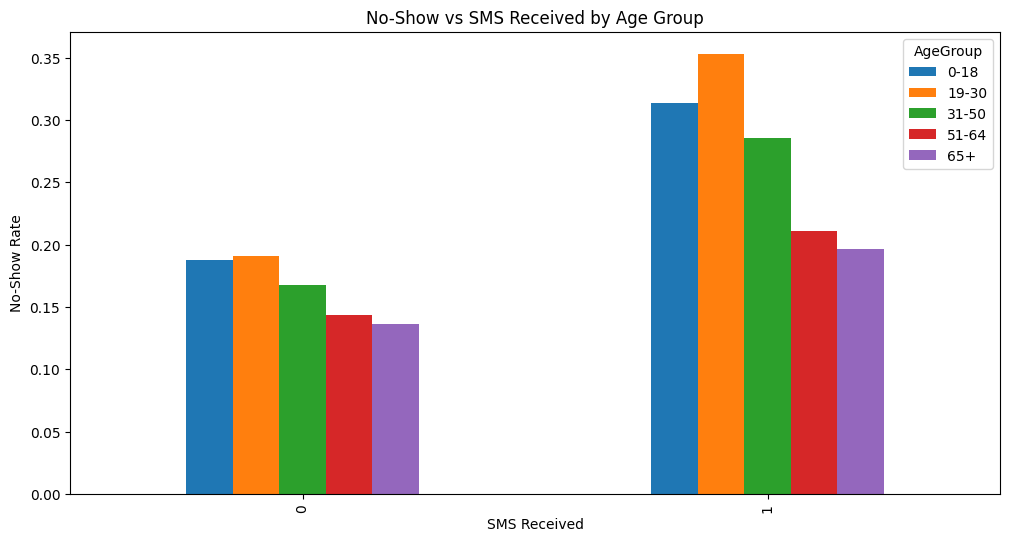

In [11]:
# Create AgeGroup column
df['AgeGroup'] = pd.cut(df['Age'], bins = [0,18,30,50,64,115], labels = ['0-18', '19-30', '31-50', '51-64', '65+'])

# Group by age group
sms_age_group_no_shows = df.groupby(['SMS_received', 'AgeGroup'])['No-show'].mean().unstack()

# No-Show VS SMS Received by Age Group
sms_age_group_no_shows.plot(kind='bar', figsize=(12,6))
plt.xlabel("SMS Received")
plt.ylabel("No-Show Rate")
plt.title("No-Show vs SMS Received by Age Group")
plt.show()

This analysis indicates that age group does not make a difference on if receiving an SMS appointment reminder decreases the number of no-shows.

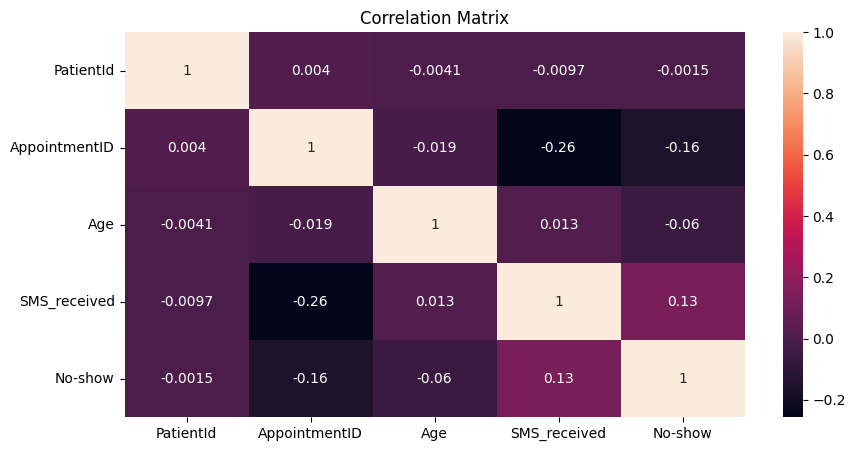

In [12]:
# Numeric df for correlation matrix
df_numeric = df.select_dtypes(include = ['number'])

# Correlation matrix
plt.figure(figsize = (10,5))
sns.heatmap(df_numeric.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

Based on our EDA, we can conclude that SMS appointment reminders do not decrease no-shows, as technically more patients were no-shows when they did receive the SMS reminder. When analyzed by age group, we came to the conclusion that every age group was still more likely to be a no-show even if they received the SMS reminder. Our correlation matrix also shows no strong coorelations.

## Statistical Analysis

In [13]:
from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(df['SMS_received'], df['No-show'])

# Chi-Square Test
chi2, p, dof, ex = chi2_contingency(contingency_table)

# Print results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 1765.9758338861106
P-value: 0.0


Because the P-value is less than 0.05, it indicates that there is a statistically significant relationship between the patient receiving an SMS reminder and if they are a no-show. This could also be caused by a large sample size, so it's important to also consider the results of the EDA.

## Machine Learning

Model Accuracy: 0.6516074552144279


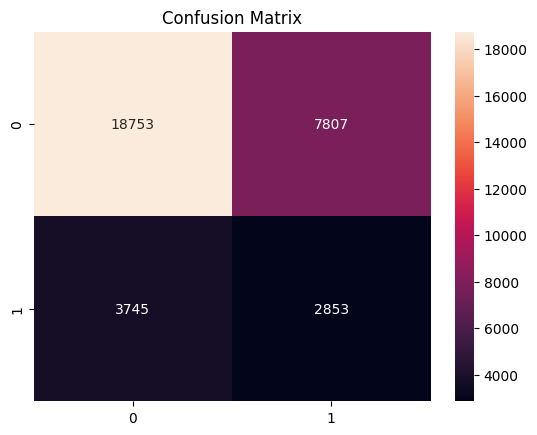

              precision    recall  f1-score   support

           0       0.83      0.71      0.76     26560
           1       0.27      0.43      0.33      6598

    accuracy                           0.65     33158
   macro avg       0.55      0.57      0.55     33158
weighted avg       0.72      0.65      0.68     33158



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df[['SMS_received']]
y = df['No-show']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model training
logistic_regression = LogisticRegression(class_weight='balanced', max_iter=1000)
logistic_regression.fit(X_train, y_train)

# Model predictions
y_pred = logistic_regression.predict(X_test)

# Accuracy calculation
print(f"Model Accuracy: {accuracy_score(y_test, y_pred)}")

# Confusion Matrix
c_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(c_matrix, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

Insights:

- The accuracy of the model could be improved, as currently it is only 65% accurate. 
- The model is better at predicting attended appointments accurately than it is at predicting no-shows. The model only predicts 27% of no-shows correctly.
- The model has a high number of false positives, meaning it frequently predicts no-shows for attended appointments.